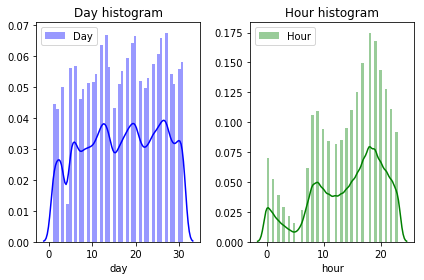

"\nHOURS:\nrush hours: 17 - 20\nthe smallest traffic: 4 - 6\npeople get out of/go to work at: 8-10, after 15\nwe need more taxes after 15\n\nDAYS:\nwe have some decrease on day 5. Maybe there was a free day? weather problems?\nLook at the next day, we have increase. No, decrease wasn't 'cause of weather\nwe see when we had weekend (wave increase in every week)\n"

In [1]:
"""
We have here some analysis about time
-> with using lpep_pickup_datatime and lpep_dropoff_datetime
unfortunately we have too small sample for true statistics of the day of the month. 
For this - we should upload more files (from february, march...)
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

taxi=pd.read_csv('datas.csv')
taxi["lpep_pickup_datetime"] = pd.to_datetime(taxi["lpep_pickup_datetime"])
taxi["lpep_dropoff_datetime"] = pd.to_datetime(taxi["lpep_dropoff_datetime"])

taxi['month'] = taxi.lpep_pickup_datetime.dt.month
taxi['day'] = taxi.lpep_pickup_datetime.dt.day
taxi['weekday'] = taxi.lpep_pickup_datetime.dt.weekday
taxi['hour'] = taxi.lpep_pickup_datetime.dt.hour


plt.subplot(1,2,1)
plt.title("Day histogram")
sns.distplot(taxi['day'], color='blue', label="Day")
plt.legend()

plt.subplot(1,2,2) 
sns.distplot(taxi['hour'], color='green', label="Hour")
plt.title("Hour histogram")
plt.legend()
plt.tight_layout() 
plt.show()

"""
HOURS:
rush hours: 17 - 20
the smallest traffic: 4 - 6
people get out of/go to work at: 8-10, after 15
we need more taxes after 15

DAYS:
we have some decrease on day 4. Maybe there was a free day? weather problems?
Look at the next day, we have increase.
we see when we had weekend (wave increase in every week)
"""


In [2]:
#check rush hours without histogram: 
taxi.groupby('hour').size().sort_values(ascending=False)
#rush hours: 17 - 20
#we can create night rate after 20 or 21 hour. 
#night rate after 24 hour = less money. 

hour
18    25056
19    24128
17    21462
20    20603
21    18300
16    17925
22    15894
15    15751
9     15733
8     15148
14    13589
10    13482
23    13163
13    12259
11    12071
12    11781
0     10072
7      8869
1      7552
2      5552
3      4219
6      3809
4      3075
5      2241
dtype: int64

In [29]:
h_b=lambda x,y: len(taxi[taxi['hour'].between(x,y)])
print(len(taxi)/h_b(0,5))
#all rides are 9.5 x more than ones between 0 and 5 (1/5 of day).

9.529944055516493


In [30]:
#take the same length of range, but with rush hours: 
print(len(taxi)/h_b(17,21))

2.8456124656546384


In [32]:
print(h_b(17,21)/h_b(0,5))
#there should be more drivers during rush hours - 3,35 more than in the night. 

3.3489957506649137


In [3]:
#and do the same with days:
taxi.groupby('day').size().sort_values(ascending=False)
#what we have between day 1 and 4? Are people waiting for the payments? 
#Maybe, we have huge increase for day 5 and 6. 

day
27    12633
13    12485
20    12418
26    12351
19    12026
12    11869
25    11335
18    11083
31    10873
24    10779
6     10656
14    10544
5     10517
30    10445
17    10297
11    10139
28    10134
23     9880
21     9727
10     9634
9      9577
16     9562
29     9560
3      9340
22     9271
8      9220
7      8622
1      8341
15     8070
2      8038
4      2308
dtype: int64

In [12]:
le=lambda x: len(taxi[taxi['day']==x])
print( "Day 4: ", le(4), " and day 5: ", le(5))
print(le(5)//le(4), "x less (day by day!)")

"""
Solution is simple - check weather: 
https://www.weather.gov/okx/Blizzard_Jan42018
there was blizzard on 4th of january!
Weather problems has huge impact on statistics of nyc. We should take files from other months of year to clearer view. 
"""

Day 4:  2308  and day 5:  10517
4 x less (day by day!)


In [ ]:
"""
to do:
relation between time (hour) and: 
- trip_duration
- trip_distance
- tips (more tips before job or after evening parties?)
"""